# Programa Ingenias+ Data Science

Ya dijimos previamente que un proyecto de data science tiene varias etapas:

1. Recolección de Datos
2. Exploración y Procesamiento de los datos
3. Modelado
4. Puesta en Producción

En la clase anterior, hicimos el analisis exploratorio de los datos y pudimos observar el tipo de datos que teniamos. Pudimos hacernos preguntas y ver algunos patrones. Todo ese conocimiento que adquirimos es útil para llevar a cabo la próxima parte de esta etapa: el procesamiento de los datos.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

<font size=5>  🚀 Procesamiento de datos 👩🏽‍💻</font>

Una vez que visualizamos y exploramos el dataset tenemos una idea de como lucen nuestros datos. Es por eso que ahora debemos empezar a preparar nuestros datos para los siguientes pasos según lo que aprendimos de ellos y las preguntas que nos planteamos.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ruta_del_archivo = '/content/drive/My Drive/JUMP/Propuestas/Clase 9 - Exploración de datos/blackfriday.csv'

df = pd.read_csv(ruta_del_archivo) # Importar el archivo CSV

In [ ]:
#blackfriday = pd.read_csv('blackfriday.csv')

In [ ]:
blackfriday = df

#### 1) TRANSFORMACION DE VARIABLES

- La mayoría de los algoritmos de machine learning no admiten `strings` como variables y requieren que las variables sean numericas. Por ese motivo, es necesario convertir las variables categoricas en su representación numerica. Para esto hay varias opciones que iremos viendo.

**LabelEncoder:**
*  asigna un número entero único a cada categoría de la variable categórica. Ejemplo: categorías "Rojo", "Verde" y "Azul", LabelEncoder podría asignarles los valores 0, 1 y 2 respectivamente.
* Ventajas: Es simple de usar. Útil cuando tienes una **variable objetivo categórica**.
* Desventajas: podría crear una relación ordinal artificial entre las categorías


**get_dummies:**
* crea columnas separadas para cada categoría en una variable categórica y asigna 1 o 0 dependiendo de si la observación pertenece a esa categoría o no.
* Ventajas: Conserva la información de todas las categorías sin crear una relación ordinal entre ellas. Fácil de entender y de usar.
* Desventajas: Puede generar un gran número de columnas si la variable categórica tiene muchas categorías. Puede causar multicolinealidad si se utiliza en modelos de regresión lineal.


**OneHotEncoder:**
* también crea columnas separadas para cada categoría, pero a diferencia de get_dummies, trabaja con matrices numéricas y, por lo tanto, generalmente se usa después de LabelEncoder.

(OneHotEncoder toma una matriz de enteros y convierte cada entero en un vector binario de longitud igual al número total de categorías, donde solo una de las posiciones tiene un 1 y el resto son 0)
* Ventajas: No asume una relación ordinal entre las categorías. Puede manejar variables categóricas con muchas categorías.
* Desventajas: Requiere un paso adicional de LabelEncoder antes de aplicarlo en scikit-learn. Puede ser más complejo de usar que get_dummies.



---



---



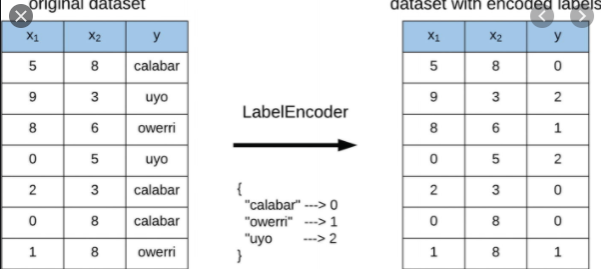

##### **LabelEncoder()**

LabelEncoder de **scikit-learn** es una herramienta que convierte variables categóricas en valores numéricos.

Básicamente, asigna un número entero único a cada categoría en la variable categórica.

Función: Asigna un valor numérico único a cada categoría en la variable categórica.

Modificación del DataFrame: No modifica el DataFrame original, trabaja sobre una sola columna.

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
test_encoder = LabelEncoder()   #crea un objeto de la clase LabelEncoder de la biblioteca scikit-learn. Transfomaciones

In [ ]:
blackfriday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      483819 non-null  object 
 3   Age                         510698 non-null  float64
 4   Occupation                  456940 non-null  float64
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    526825 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 49.2+ MB


In [ ]:
blackfriday.loc[:, 'City_Category'] = test_encoder.fit_transform(blackfriday['City_Category'])
# usa el objeto previo
# selecciona una columna
# método fit_transform() del objeto test_encoder: 'City_Category' --> transforma las etiquetas categóricas en valores numéricos únicos
# .loc = se asignan de vuelta a la columna 'City_Category' del df blackfriday, REEMPLAZANDO las etiquetas categóricas originales con los valores numéricos

In [ ]:
blackfriday.sample(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
509045,1000415,P00336942,F,41.0,0.0,0,2,1,5,NaN,NaN,7109.0
387303,1005598,P00014542,M,23.0,NaN,2,1,0,8,NaN,NaN,7905.0
64351,1003855,P00073842,M,33.0,17.0,2,1,1,1,15.0,17.0,15319.0
160558,1000850,P00276042,M,39.0,0.0,0,3,1,2,8.0,NaN,10006.0
195442,1000157,P00365242,M,NaN,16.0,0,1,0,5,8.0,NaN,7091.0
303954,1004800,P00110842,M,NaN,NaN,0,1,0,1,2.0,5.0,19060.0
113043,1005452,P00248942,M,44.0,6.0,0,4+,0,1,6.0,14.0,18987.0
422808,1005070,P00275842,M,31.0,2.0,0,0,0,2,9.0,15.0,16353.0
395898,1000971,P00241642,M,30.0,NaN,1,2,1,1,2.0,11.0,11660.0
482561,1002248,P00176842,F,36.0,12.0,2,2,0,12,14.0,NaN,1434.0


In [ ]:
'''
# Paso 1: Crear el objeto LabelEncoder
test_encoder = LabelEncoder()

# Paso 2: Ajustar el LabelEncoder a los datos de 'City_Category'
test_encoder.fit(blackfriday['City_Category']) # LabelEncoder está "aprendiendo" qué categorías existen en esa columna y cómo debe asignarles valores numéricos
# Si tuviera una caja con diferentes tipos de frutas, pero no sé qué tipos exactos de frutas hay
# antes de poder asignar un número a cada tipo de fruta, primero hay que revisar la caja y ver qué tipos de frutas hay disponibles
# este paso es como mirar dentro de la caja para ver qué frutas hay ;)

# Paso 3: Transformar las etiquetas categóricas en valores numéricos
city_category_encoded = test_encoder.transform(blackfriday['City_Category'])
# acá ya se que hay banana, naranja y manzana, estoy asignando numeros a cada fruta (etiquetas) Numero unico

# Paso 4: Asignar los valores numéricos de vuelta a la columna 'City_Category' en blackfriday
blackfriday.loc[:, 'City_Category'] = city_category_encoded # reemplazo y tengo 0, 1, 2
'''

In [ ]:
blackfriday.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,14.0,10.0,0,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,15.0,NaN,0,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,NaN,15.0,10.0,0,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,15.0,10.0,0,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,60.0,16.0,2,4+,0,8,NaN,NaN,7969.0


In [ ]:
# EJEMPLO
data = {'Género': ['Masculino', 'Femenino', 'Masculino', 'Femenino']}
df_ejemplo = pd.DataFrame(data)

encoder = LabelEncoder()
df_ejemplo['Género_encoded'] = encoder.fit_transform(df_ejemplo['Género'])
print(df_ejemplo)

      Género  Género_encoded
0  Masculino               1
1   Femenino               0
2  Masculino               1
3   Femenino               0


In [ ]:
encoder.classes_ # orden!!

array(['Femenino', 'Masculino'], dtype=object)



---



---



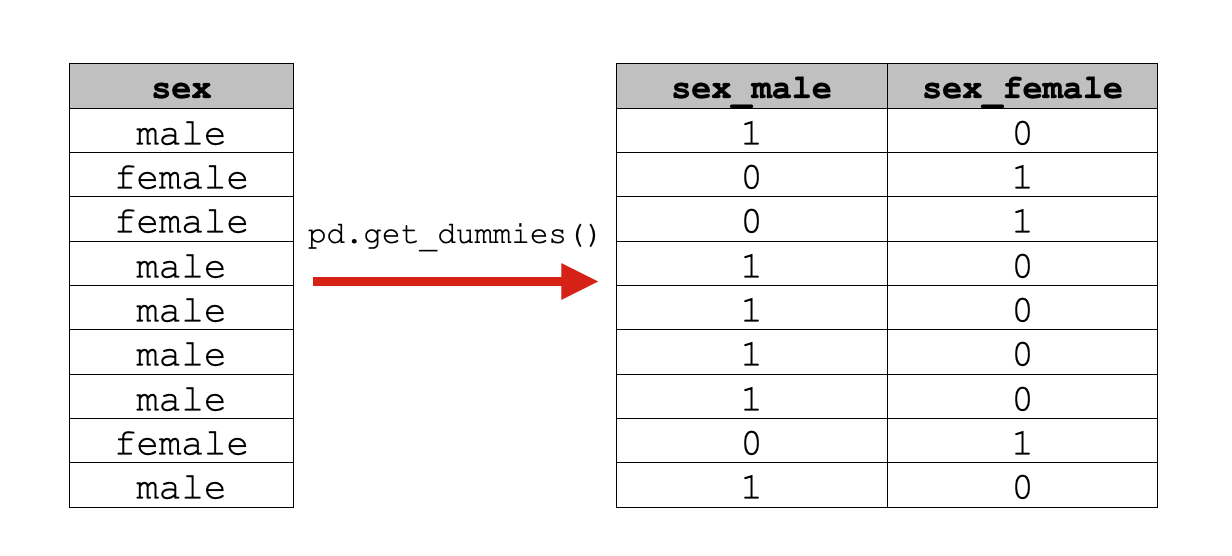

#####**get_dummies()**

Herramienta de **pandas** que se utiliza para crear variables dummy a partir de variables categóricas.  

Convierte variables categóricas en una representación binaria

Función: Crea una nueva columna binaria para cada categoría única en la variable categórica.

Modificación del DataFrame: No modifica el DataFrame original, crea un nuevo DataFrame con las variables dummy.

In [ ]:
# EJEMPLO
data = {'Género': ['Masculino', 'Femenino', 'Masculino', 'Femenino']}
df_ejemplo2 = pd.DataFrame(data)

df_dummy = pd.get_dummies(df_ejemplo2)
print(df_dummy)

   Género_Femenino  Género_Masculino
0            False              True
1             True             False
2            False              True
3             True             False


In [ ]:
pd.get_dummies(blackfriday, columns=["Gender"])
#  Se identifica la columna "Gender" como la columna que se va a convertir en variables dummy
#  Para cada categoría única en la columna "Gender", se crea una nueva columna binaria en el df resultante
#  nuevas columnas binarias

,User_ID,Product_ID,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Gender_F,Gender_M
0,1000001,P00069042,14.0,10.0,0,2,0,3,NaN,NaN,8370.0,True,False
1,1000001,P00248942,15.0,NaN,0,2,0,1,6.0,14.0,15200.0,True,False
2,1000001,P00087842,15.0,10.0,0,2,0,12,NaN,NaN,1422.0,False,False
3,1000001,P00085442,15.0,10.0,0,2,0,12,14.0,NaN,1057.0,True,False
4,1000002,P00285442,60.0,16.0,2,4+,0,8,NaN,NaN,7969.0,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
537572,1004737,P00193542,43.0,16.0,2,1,0,1,2.0,NaN,11664.0,False,True
537573,1004737,P00111142,37.0,16.0,2,1,0,1,15.0,16.0,19196.0,False,True
537574,1004737,P00345942,41.0,16.0,2,1,0,8,15.0,NaN,8043.0,False,True
537575,1004737,P00285842,38.0,16.0,2,1,0,5,NaN,NaN,7172.0,False,True


In [ ]:
pd.get_dummies(blackfriday["Gender"])

,F,M
0,True,False
1,True,False
2,False,False
3,True,False
4,False,True
...,...,...
537572,False,True
537573,False,True
537574,False,True
537575,False,True


In [ ]:
blackfriday[['female', 'male']] = pd.get_dummies(blackfriday["Gender"])
#  Se obtienen 2 nuevas columnas binarias (por ejemplo, 'female' y 'male').
# las nuevas columnas binarias se asignan de vuelta al df blackfriday, se crean  así las columnas llamadas 'female' y 'male'


In [ ]:
blackfriday.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,female,male
0,1000001,P00069042,F,14.0,10.0,0,2,0,3,NaN,NaN,8370.0,True,False
1,1000001,P00248942,F,15.0,NaN,0,2,0,1,6.0,14.0,15200.0,True,False
2,1000001,P00087842,NaN,15.0,10.0,0,2,0,12,NaN,NaN,1422.0,False,False
3,1000001,P00085442,F,15.0,10.0,0,2,0,12,14.0,NaN,1057.0,True,False
4,1000002,P00285442,M,60.0,16.0,2,4+,0,8,NaN,NaN,7969.0,False,True




---



---



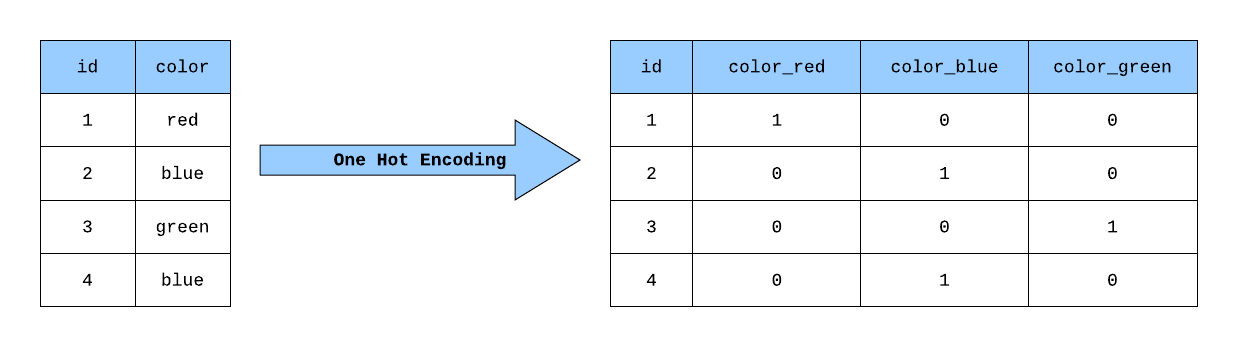

##### **OneHotEncoder()**

Se utiliza en **scikit-learn** para convertir variables categóricas en representaciones numéricas.

Función: Crea una matriz de características donde cada columna representa una categoría única y contiene valores binarios (0 o 1).

Modificación del DataFrame: No modifica el DataFrame original, trabaja sobre matrices independientes.

In [ ]:
from sklearn.preprocessing import OneHotEncoder

data = {'Género': ['Masculino', 'Femenino', 'Masculino', 'Femenino']}
df_ejemplo3 = pd.DataFrame(data)

encoder = OneHotEncoder()
df_encoded = encoder.fit_transform(df_ejemplo3[['Género']])
# print(df_encoded.toarray()) # representación en forma de matriz de una matriz dispersa
print(df_ejemplo3)

      Género
0  Masculino
1   Femenino
2  Masculino
3   Femenino


In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
blackfriday['Gender'].unique() #cuales son los unicos

array(['F', nan, 'M'], dtype=object)

In [ ]:
gender_encoder = OneHotEncoder()

In [ ]:
gender_encoder.fit_transform(blackfriday[['Gender']]).toarray()

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [ ]:
gender_encoder.categories_ # devuelve las categorías únicas que fueron codificadas por el codificador

[array(['F', 'M', nan], dtype=object)]

In [ ]:
niveles = gender_encoder.categories_[0].tolist()

In [ ]:
niveles

['F', 'M', nan]

In [ ]:
one_hot_gender = pd.DataFrame(gender_encoder.fit_transform(blackfriday[['Gender']]).toarray(), columns=niveles)
# método fit_transform() primero ajusta el codificador a los datos (aprende las categorías únicas, por ejemplo)
# y luego transforma los datos en su representación codificada
# El resultado (una matriz dispersa) se transforma con toarray()

In [ ]:
one_hot_gender

,F,M,NaN
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,1.0,0.0,0.0
4,0.0,1.0,0.0
...,...,...,...
537572,0.0,1.0,0.0
537573,0.0,1.0,0.0
537574,0.0,1.0,0.0
537575,0.0,1.0,0.0


In [ ]:
new_df = pd.concat([blackfriday, one_hot_gender], axis=1)

In [ ]:
new_df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,female,male,F,M,NaN
0,1000001,P00069042,F,14.0,10.0,0,2,0,3,NaN,NaN,8370.0,True,False,1.0,0.0,0.0
1,1000001,P00248942,F,15.0,NaN,0,2,0,1,6.0,14.0,15200.0,True,False,1.0,0.0,0.0
2,1000001,P00087842,NaN,15.0,10.0,0,2,0,12,NaN,NaN,1422.0,False,False,0.0,0.0,1.0
3,1000001,P00085442,F,15.0,10.0,0,2,0,12,14.0,NaN,1057.0,True,False,1.0,0.0,0.0
4,1000002,P00285442,M,60.0,16.0,2,4+,0,8,NaN,NaN,7969.0,False,True,0.0,1.0,0.0


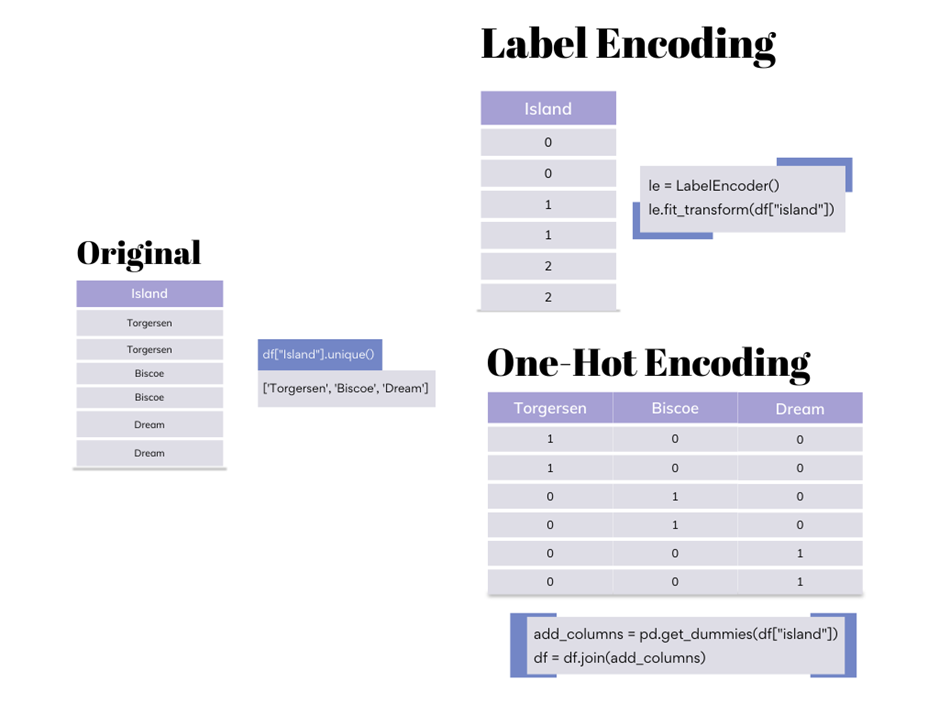

In [ ]:
# EJEMPLO ADICIONAL
data = {'Color': ['Rojo', 'Verde', 'Azul', 'Rojo', 'Verde', 'Azul']}
df_ej_color = pd.DataFrame(data)

# Label Encoding
label_encoder = LabelEncoder()
df_ej_color['Color_LabelEncoded'] = label_encoder.fit_transform(df_ej_color['Color'])

# One-Hot Encoding
onehot_encoder = OneHotEncoder(sparse=False)
onehot_encoded = onehot_encoder.fit_transform(df_ej_color[['Color']])
onehot_df = pd.DataFrame(onehot_encoded, columns=onehot_encoder.get_feature_names_out(['Color']))

# get_dummies
get_dummies_df = pd.get_dummies(df_ej_color['Color'], prefix='Color')

# Vemos los resultados
print("Original DataFrame:")
print(df_ej_color)
print("\nLabel Encoding:")
print(df_ej_color[['Color_LabelEncoded']])
print("\nOne-Hot Encoding con OneHotEncoder:")
print(onehot_df)
print("\n get_dummies:")
print(get_dummies_df)

Original DataFrame:
   Color  Color_LabelEncoded
0   Rojo                   1
1  Verde                   2
2   Azul                   0
3   Rojo                   1
4  Verde                   2
5   Azul                   0

Label Encoding:
   Color_LabelEncoded
0                   1
1                   2
2                   0
3                   1
4                   2
5                   0

One-Hot Encoding con OneHotEncoder:
   Color_Azul  Color_Rojo  Color_Verde
0         0.0         1.0          0.0
1         0.0         0.0          1.0
2         1.0         0.0          0.0
3         0.0         1.0          0.0
4         0.0         0.0          1.0
5         1.0         0.0          0.0

 get_dummies:
   Color_Azul  Color_Rojo  Color_Verde
0       False        True        False
1       False       False         True
2        True       False        False
3       False        True        False
4       False       False         True
5        True       False        False


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(




---



---



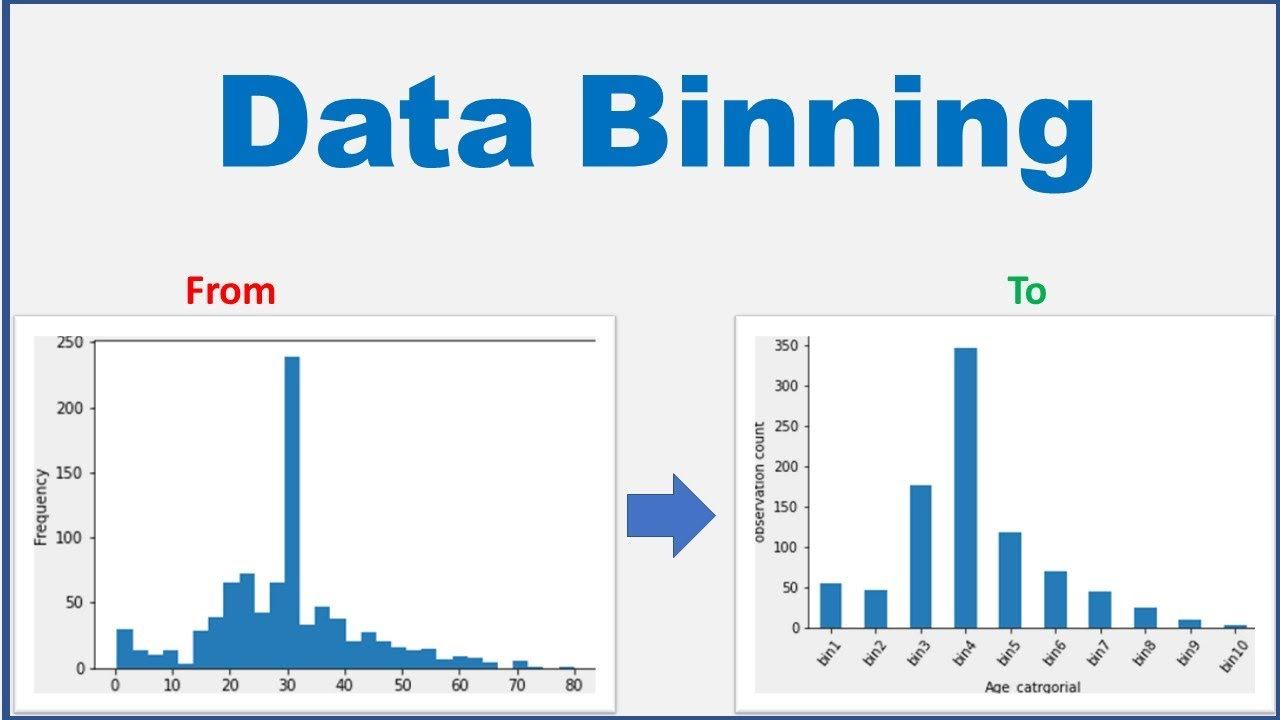

#### **binning**

Para dividir un conjunto de datos en grupos más pequeños, llamados "bins" o "contenedores".

Estos contenedores contienen valores dentro de ciertos rangos o intervalos.

Ejemplo: tenemos una lista de números que representan edades y queremos agrupar estas edades en rangos, como "niño", "adolescente", "adulto joven", "adulto" y "anciano".
En es es un tipo de binning dividimos las edades en categorías más generales.

En Python, se puede realizar binning usando diferentes métodos dependiendo de la biblioteca: por ejemplo **cut**

Extra: qcut() para dividir los datos en bins basados en cuantiles (porcentaje de datos)

In [ ]:
print(blackfriday.Age.min())
print(blackfriday.Age.max())

14.0
74.0


In [ ]:
bin_age = [10, 17, 70, 80]
# se definen los límites de los bins. En este caso: [10, 17], [17, 70] y [70, 80]
# abierto o cerrado? <- cerrados a la izquierda y abiertos a la derecha
# [10, 17) incluye los valores de 10 a 16.999...
# [17, 70) incluye los valores de 17 a 69.999...
# [70, 80) incluye los valores de 70 a 79.999...

labels = ["Adolescente", "Adulto", "Anciano"]
# define las etiquetas para cada bin. Se asignarán a los datos según el bin al que pertenezcan

age_categories = pd.cut(blackfriday["Age"], bins=bin_age, labels=labels) # aplica binning
# el resultado es una nueva serie llamada "age_categories"=  categorías de edad para cada fila del df original

In [ ]:
age_categories

0         Adolescente
1         Adolescente
2         Adolescente
3         Adolescente
4              Adulto
             ...     
537572         Adulto
537573         Adulto
537574         Adulto
537575         Adulto
537576         Adulto
Name: Age, Length: 537577, dtype: category
Categories (3, object): ['Adolescente' < 'Adulto' < 'Anciano']